# UNIDAD 2: Representación vectorial de texto


## 1. Modelo espacio-vectorial

### 1.1 Vectorizador TF-IDF

El vectorizador TF-IDF es una técnica, basada en el modelo espacio-vectorial, que se utiliza para transformar una colección de documentos **sin procesar** en una matriz de características numéricas que se puede utilizar como *entrada para algoritmos de aprendizaje automático*.

Funciona calculando la frecuencia de término (TF) de cada palabra de un documento, que representa la frecuencia con la que aparece la palabra, y la frecuencia inversa del documento (IDF) de cada palabra, que representa la rareza o la frecuencia común de la palabra en todo el corpus.

**sklearn** ofrece la clase *TfidfVectorizer*, la cual podemos utilizar para transformar un conjunto de documentos. 

Para calcular la matriz TF-IDF usamos el método **fit_transform**, el cual convierte los documentos en una matriz de TF-IDF donde cada fila representa un documento y cada columna representa una palabra. Los valores en la matriz corresponden a los pesos TF-IDF de cada palabra en cada documento.


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=['spanish'])

reviews = pd.DataFrame(['El pescado al horno es el mejor.',
           'El servicio es insuperable',
           'El pescado al horno es insuperable, pero el servicio es malo.',
           'El mejor servicio es el pescado al horno.'], columns = ['review'])

# Crear el TfidfVectorizer, eliminando stop words para optimizar el análisis
data_vector = tfidf.fit_transform(reviews['review'].to_list()).toarray()

In [2]:
pd.set_option('display.max_colwidth', 200)
reviews

,review
0,El pescado al horno es el mejor.
1,El servicio es insuperable
2,"El pescado al horno es insuperable, pero el servicio es malo."
3,El mejor servicio es el pescado al horno.


In [3]:
# Mostrar la matriz TF-IDF
print(data_vector)

[[0.35651171 0.58294337 0.29147169 0.35651171 0.         0.
  0.44036289 0.         0.35651171 0.        ]
 [0.         0.41599288 0.41599288 0.         0.6284927  0.
  0.         0.         0.         0.50881901]
 [0.2517201  0.41159535 0.41159535 0.2517201  0.3109244  0.39436818
  0.         0.39436818 0.2517201  0.2517201 ]
 [0.3358091  0.54909189 0.27454594 0.3358091  0.         0.
  0.41479105 0.         0.3358091  0.3358091 ]]


In [4]:
#Determinar la similitud entre documentos:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

print(reviews.review)

def cosine_similarity_matrix(features):
    norms = np.linalg.norm(features, axis=1, keepdims=True)
    normalized_features = features / norms
    similarity_matrix = np.inner(normalized_features, normalized_features)
    rounded_similarity_matrix = np.round(similarity_matrix, 4)
    return rounded_similarity_matrix

sim = cosine_similarity_matrix(data_vector)
print(sim)

0                                 El pescado al horno es el mejor.
1                                       El servicio es insuperable
2    El pescado al horno es insuperable, pero el servicio es malo.
3                        El mejor servicio es el pescado al horno.
Name: review, dtype: object
[[1.     0.3638 0.6291 0.9419]
 [0.3638 1.     0.6659 0.5135]
 [0.6291 0.6659 1.     0.6771]
 [0.9419 0.5135 0.6771 1.    ]]


In [5]:
# Mostrar las palabras
print(tfidf.get_feature_names_out())

# Verificar el valor IDF de cada palabra:
print(tfidf.idf_)

['al' 'el' 'es' 'horno' 'insuperable' 'malo' 'mejor' 'pero' 'pescado'
 'servicio']
[1.22314355 1.         1.         1.22314355 1.51082562 1.91629073
 1.51082562 1.91629073 1.22314355 1.22314355]


In [6]:
#¿Cómo se interpreta cada valor?
print(reviews.iloc[1])
print(data_vector[1],'\n') # Vector de características del documento 1.

# El -> 0.34399327
# servicio -> 0.51971385
# es -> 0.42075315
# insuperable -> 0.65919112

review    El servicio es insuperable
Name: 1, dtype: object
[0.         0.41599288 0.41599288 0.         0.6284927  0.
 0.         0.         0.         0.50881901] 



Cada número en la matriz TF-IDF indica la importancia relativa de una palabra en un documento. Un valor más alto significa que la palabra es más relevante en ese documento en comparación con los otros. Esto nos permite identificar qué palabras son significativas para cada documento, lo cual es útil para tareas de clasificación, búsqueda, y análisis de similitud de texto.

In [7]:
# Cálculo luego del preprocesamiento de texto:

In [8]:
from preprocessing import remove_urls, remove_html, remove_punctuation, remove_emoji
from preprocessing import remove_hashtags_mentions, remove_numbers, replace_strings
from preprocessing import remove_stopwords, stemming_eng, lemmatizer_eng
from nltk.tokenize import word_tokenize
import nltk
# Preprocesamiento de texto:
import string
PUNCTUATION = string.punctuation
reviews['clean_msg']= reviews['review'].apply(lambda x:remove_punctuation(x, PUNCTUATION))
reviews['msg_lower']= reviews['clean_msg'].apply(lambda x: x.lower())
reviews['msg_tokenized']= reviews['msg_lower'].apply(lambda x: word_tokenize(x))
STOPWORDS = nltk.corpus.stopwords.words('spanish')
reviews['no_stopwords']= reviews['msg_tokenized'].apply(lambda x:remove_stopwords(x, STOPWORDS))
reviews

,review,clean_msg,msg_lower,msg_tokenized,no_stopwords
0,El pescado al horno es el mejor.,El pescado al horno es el mejor,el pescado al horno es el mejor,"[el, pescado, al, horno, es, el, mejor]","[pescado, horno, mejor]"
1,El servicio es insuperable,El servicio es insuperable,el servicio es insuperable,"[el, servicio, es, insuperable]","[servicio, insuperable]"
2,"El pescado al horno es insuperable, pero el servicio es malo.",El pescado al horno es insuperable pero el servicio es malo,el pescado al horno es insuperable pero el servicio es malo,"[el, pescado, al, horno, es, insuperable, pero, el, servicio, es, malo]","[pescado, horno, insuperable, servicio, malo]"
3,El mejor servicio es el pescado al horno.,El mejor servicio es el pescado al horno,el mejor servicio es el pescado al horno,"[el, mejor, servicio, es, el, pescado, al, horno]","[mejor, servicio, pescado, horno]"


In [9]:
clean_reviews = [' '.join(r) for r in reviews['no_stopwords']]
tfidf2 = TfidfVectorizer()
data_vector2 = tfidf2.fit_transform(clean_reviews).toarray()

# Verificar el valor IDF de cada texto:
print(tfidf2.idf_)

tfidf2.get_feature_names_out()

[1.22314355 1.51082562 1.91629073 1.51082562 1.22314355 1.22314355]


array(['horno', 'insuperable', 'malo', 'mejor', 'pescado', 'servicio'],
      dtype=object)

In [10]:
data_vector2

array([[0.53256952, 0.        , 0.        , 0.65782931, 0.53256952,
        0.        ],
       [0.        , 0.77722116, 0.        , 0.        , 0.        ,
        0.62922751],
       [0.37849896, 0.46752152, 0.59299177, 0.        , 0.37849896,
        0.37849896],
       [0.47006328, 0.        , 0.        , 0.58062167, 0.47006328,
        0.47006328]])

In [11]:
#[servicio, insuperable]
data_vector2[1]

array([0.        , 0.77722116, 0.        , 0.        , 0.        ,
       0.62922751])

## 2. Modelo probabilístico de tópicos 

### 2.1 LDA

In [12]:
#Comencemos importando la biblioteca pandas y leyendo los datos.
import pandas as pd

# Cargar el dataset, cada línea está compuesta por dos columnas:
# v1 contiene la etiqueta (ham o spam) y
# v2 contiene el texto sin formato.
# Además, algunas filas tienen celdas sin valor.
data = pd.read_csv("../datasets/spam.csv",encoding="ISO-8859-1",
                   header=None, skiprows=1,
                   names = ["target", "text", "v3", "v4", "v5"])

#Ampliación de ancho del display para ver mejor el texto de la columna de mensajes.
pd.set_option('display.max_colwidth', 300)

#Usar las dos primeras columnas y renombrarlas:
data= data [['target','text']]
data.sample(5, random_state=42)


,target,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens"
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones"
1044,spam,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p"
2484,ham,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
812,spam,Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16


#### Limpieza de texto

In [13]:
# Importar librerías necesarias:

import re
from bs4 import BeautifulSoup
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from preprocessing import remove_urls, remove_html, remove_punctuation, remove_emoji
from preprocessing import remove_hashtags_mentions, remove_numbers, replace_strings
from preprocessing import remove_stopwords, stemming_eng, lemmatizer_eng

In [14]:
# Aplicar tareas de limpieza de texto que hagan falta:

#Convertir el texto en minúsculas:
data['clean_text']= data['text'].apply(lambda x: x.lower())
data.sample(5)

#Eliminar URLs:
data['clean_text']= data['clean_text'].apply(lambda x:remove_urls(x))

#Eliminar signos de puntuación:
PUNCTUATION = """!"#$%&()*+,-./:;<=>?@[\]^_`{|}~"""
data['clean_text']= data['clean_text'].apply(lambda x:remove_punctuation(x, PUNCTUATION))

#Eliminar números:
data['clean_text']= data['clean_text'].apply(lambda x:remove_numbers(x))

# Reemplazar cadenas de texto por equivales (como las contracciones):
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'can not'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]

patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
data['clean_text']= data['clean_text'].apply(lambda x:replace_strings(x, patterns))

# Tokenizar texto:
wordnet_lemmatizer = WordNetLemmatizer() #defining the object for Lemmatization
data['tokenized_text']= data['clean_text'].apply(lambda x: word_tokenize(x))

#Eliminación de palabras vacias:
STOPWORDS = nltk.corpus.stopwords.words('english')
STOPWORDS = STOPWORDS + ['hi', 'ok', 'u', 'well', 'oh', 'ltgt']
data['norm_text']= data['tokenized_text'].apply(lambda x: remove_stopwords(x, STOPWORDS))

#Lematizar:
wordnet_lemmatizer = WordNetLemmatizer() # #defining the object for Lemmatization
data['norm_text']=data['norm_text'].apply(lambda x:lemmatizer_eng(x, wordnet_lemmatizer))

# Observar el resultado:

data.sample(5, random_state = 42)

,target,text,clean_text,tokenized_text,norm_text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens",funny fact nobody teaches volcanoes erupt tsunamis arise hurricanes sway aroundn no teaches hw choose a wife natural disasters just happens,"[funny, fact, nobody, teaches, volcanoes, erupt, tsunamis, arise, hurricanes, sway, aroundn, no, teaches, hw, choose, a, wife, natural, disasters, just, happens]","[funny, fact, nobody, teach, volcano, erupt, tsunami, arise, hurricane, sway, aroundn, teach, hw, choose, wife, natural, disaster, happens]"
944,ham,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones",i sent my scores to sophas and i had to do secondary application for a few schools i think if you are thinking of applying do a research on cost also contact joke ogunrinde her school is one me the less expensive ones,"[i, sent, my, scores, to, sophas, and, i, had, to, do, secondary, application, for, a, few, schools, i, think, if, you, are, thinking, of, applying, do, a, research, on, cost, also, contact, joke, ogunrinde, her, school, is, one, me, the, less, expensive, ones]","[sent, score, sophas, secondary, application, school, think, thinking, applying, research, cost, also, contact, joke, ogunrinde, school, one, le, expensive, one]"
1044,spam,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p",we know someone who you know that fancies you call to find out who pobox lshb p,"[we, know, someone, who, you, know, that, fancies, you, call, to, find, out, who, pobox, lshb, p]","[know, someone, know, fancy, call, find, pobox, lshb, p]"
2484,ham,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.,only if you promise your getting out as soon as you can and youll text me in the morning to let me know you made it in ok,"[only, if, you, promise, your, getting, out, as, soon, as, you, can, and, youll, text, me, in, the, morning, to, let, me, know, you, made, it, in, ok]","[promise, getting, soon, youll, text, morning, let, know, made]"
812,spam,Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16,congratulations ur awarded either å£ of cd gift vouchers free entry our å£ weekly draw txt music to tncs,"[congratulations, ur, awarded, either, å£, of, cd, gift, vouchers, free, entry, our, å£, weekly, draw, txt, music, to, tncs]","[congratulation, ur, awarded, either, å£, cd, gift, voucher, free, entry, å£, weekly, draw, txt, music, tncs]"


#### Aplicación de LDA

In [15]:
# Obtener cadenas transformadas del texto:
transformed_sentences = [' '.join(w) for w in data['norm_text'].to_list()] # unir todos los tokens de un mensaje en un solo string

transformed_sentences[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'lar joking wif oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over',
 'dun say early hor c already say',
 'nah think go usf life around though']

In [16]:
# Seleccionar los tokens que son sustantivos
from nltk import pos_tag

def get_noun_and_collocation(sentence):
    nouns_and_collocations = []
    noun_tags = ['NN', 'NNS']
    tokens_pos_tagged = pos_tag(word_tokenize(sentence))
    for tpos in tokens_pos_tagged:
        if '_' in tpos[0]:
            nouns_and_collocations.append(tpos[0])
        elif tpos[1] in noun_tags:
            nouns_and_collocations.append(tpos[0])
    return nouns_and_collocations
            
noun_stream = [get_noun_and_collocation(email) for email in transformed_sentences]

noun_stream[:5]

[['point', 'crazy', 'bugis', 'world', 'la', 'cine'],
 ['joking', 'wif', 'oni'],
 ['entry',
  'comp',
  'win',
  'tkts',
  'st',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply'],
 ['dun', 'hor', 'c'],
 ['life']]

In [17]:
#!pip install gensim
import gensim
import gensim.corpora as corpora

num_topics = 10
dictionary = corpora.Dictionary(noun_stream)
corpus = [dictionary.doc2bow(text) for text in noun_stream]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                               num_topics=num_topics, 
                                               random_state=1,
                                               id2word = dictionary)

ldamodel.print_topics(num_topics= num_topics, num_words=10)

[(0,
  '0.047*"time" + 0.026*"call" + 0.021*"tell" + 0.019*"da" + 0.017*"anything" + 0.012*"wat" + 0.011*"week" + 0.011*"point" + 0.010*"help" + 0.010*"show"'),
 (1,
  '0.053*"call" + 0.021*"phone" + 0.019*"day" + 0.019*"min" + 0.017*"message" + 0.017*"im" + 0.014*"text" + 0.012*"sorry" + 0.012*"stop" + 0.010*"didnt"'),
 (2,
  '0.060*"im" + 0.026*"day" + 0.025*"night" + 0.019*"work" + 0.015*"gon" + 0.013*"name" + 0.012*"tomorrow" + 0.011*"havent" + 0.011*"lor" + 0.009*"home"'),
 (3,
  '0.015*"lor" + 0.014*"im" + 0.012*"day" + 0.011*"call" + 0.011*"think" + 0.011*"wife" + 0.010*"txt" + 0.010*"time" + 0.009*"eat" + 0.008*"talk"'),
 (4,
  '0.027*"number" + 0.021*"ill" + 0.018*"face" + 0.017*"im" + 0.017*"something" + 0.015*"sorry" + 0.014*"meeting" + 0.013*"yup" + 0.012*"call" + 0.012*"please"'),
 (5,
  '0.020*"today" + 0.019*"thanks" + 0.018*"k" + 0.016*"week" + 0.013*"pls" + 0.013*"call" + 0.011*"stuff" + 0.009*"service" + 0.009*"game" + 0.008*"weekend"'),
 (6,
  '0.025*"home" + 0.018*"

#### Visualización

In [18]:
# !pip install pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.021636  0.011099       1        1  13.602396
6     -0.121378  0.117784       2        1  11.176769
2      0.146622  0.095065       3        1  10.857177
0      0.055685 -0.047574       4        1  10.187732
5     -0.101050 -0.040267       5        1   9.894725
3      0.027414  0.139717       6        1   9.460944
7      0.031936 -0.139177       7        1   9.292504
9     -0.007011 -0.054910       8        1   9.248479
4      0.097331 -0.054040       9        1   8.478756
8     -0.151184 -0.027696      10        1   7.800519, topic_info=       Term        Freq       Total Category  logprob  loglift
62       im  340.000000  340.000000  Default  30.0000  30.0000
368   thing  119.000000  119.000000  Default  29.0000  29.0000
87     time  219.000000  219.000000  Default  28.0000  28.0000
45     call  424.000000  424.000000  Default  27.0000  27.0000
407  number  114.000000  114.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
307   night   17.182671  110.612650  Topic10  -4.7388   0.6888
80    prize   13.989054   61.099476  Topic10  -4.9444   1.0768
147   thats   14.469791   88.171670  Topic10  -4.9106   0.7438
104     way   13.934906   93.824982  Topic10  -4.9483   0.6439
46    claim   12.011984  104.299283  Topic10  -5.0968   0.3896

[659 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
811       7  0.837254   access
395       4  0.647009  account
395       5  0.053917  account
395       7  0.080876  account
395       8  0.053917  account
...     ...       ...      ...
995       1  0.184290        ì
995       4  0.342252        ì
995       5  0.105308        ì
995       7  0.052654        ì
995       8  0.289598        ì

[1593 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 1, 6, 4, 8, 10, 5, 9])

 Obtener targets de las opiniones y sus aspectos utilizando el modelo word2vec

## Vectorizar palabras y términos con Word2Vec.

El paquete gensim implementa el método para entrenar modelos Word2Vec.

In [19]:
import gensim

#Crear un modelo word2vec de las opiniones lematizadas. 


w2v_opinions = gensim.models.Word2Vec(
        data.norm_text, 
        window=10, 
        min_count= 3, 
        workers= 1,
        seed=1 
)

A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos de la opinión (call) y listar términos semánticamente relacionados con estos aspectos según este modelo.


In [44]:
#Obtener el vocabulario:
vocabulary = list(w2v_opinions.wv.key_to_index.keys())

opinion_w2v_tuples = []

term = 'claim'

for i in range(0, len(vocabulary)):
    if vocabulary[i] != term and w2v_opinions.wv.similarity(term, vocabulary[i]) > 0:
        opinion_w2v_tuples.append((vocabulary[i], w2v_opinions.wv.similarity(term, vocabulary[i])))
    
opinion_w2v_sorted_tuples = sorted(opinion_w2v_tuples, key=lambda tup: tup[1], reverse=True)

labels = ['Term', 'Similitud']

df_opinion_msn = pd.DataFrame.from_records(opinion_w2v_sorted_tuples, columns=labels)

df_opinion_msn.head(20)

,Term,Similitud
0,å£,0.999648
1,draw,0.999411
2,cash,0.999407
3,urgent,0.999363
4,awarded,0.999304
5,prize,0.999157
6,call,0.999133
7,award,0.999070
8,line,0.999005
9,ppm,0.998878


Filtrar los documentos que tienen las palabras "claim" y "cash" para descubrir por qué dice la gente los relaciona de forma frecuente. 

In [27]:
data_claim = data[data['text'].str.contains('claim|cash')]
data_claim['text'].to_list()[:10]

['WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or å£1000. To claim txt DIS to 87121 18+6*å£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ',
 "Yes I started to send requests to make it but pain came back so I'm back in bed. Double coins at the factory too. I gotta cash in all my nitros.",
 'Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!',
 "Aight, I'll hit you up when I get some cash",
 'You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) ',
 'PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires',
 'Todays Voda numbers e

En varios de los mensajes revisados se identifica un patrón: **¿estafa?**

In [32]:
# Veamos la clase asociada a cada mensaje
data_claim[['text', 'target']].sample(10, random_state = 1)

,text,target
5378,"Free entry to the gr8prizes wkly comp 4 a chance to win the latest Nokia 8800, PSP or å£250 cash every wk.TXT GREAT to 80878 http//www.gr8prizes.com 08715705022",spam
1873,You have WON a guaranteed å£1000 cash or a å£2000 prize.To claim yr prize call our customer service representative on,spam
3187,"This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08712101358 NOW! Only 10p per min. BT-national-rate",spam
4045,Win a å£1000 cash prize or a prize worth å£5000,spam
4784,"Urgent -call 09066649731from Landline. Your complimentary 4* Ibiza Holiday or å£10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150ppm 18+",spam
2091,Then get some cash together and I'll text jason,ham
5368,IMPORTANT MESSAGE. This is a final contact attempt. You have important messages waiting out our customer claims dept. Expires 13/4/04. Call 08717507382 NOW!,spam
4758,Thanks 4 your continued support Your question this week will enter u in2 our draw 4 å£100 cash. Name the NEW US President? txt ans to 80082,spam
5232,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls call claim number 09066364311 to collect your award which you are selected to receive as a valued mobile customer.,spam
1740,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise ofå£2000 CASH 18+only. To opt out txt X to 07786200117,spam


La mayoría de los mensajes revisados están clasificados como **spam** ¿cuántos?

In [34]:
#cantidad de mensajes en lo que hay claim y cash:
data_claim.shape
#cantidad de mensajes por categoría:
data_claim['target'].value_counts()

target
spam    114
ham      13
Name: count, dtype: int64

In [40]:
data_claim[data_claim['target']=='ham'][['text']]

,text
87,Yes I started to send requests to make it but pain came back so I'm back in bed. Double coins at the factory too. I gotta cash in all my nitros.
106,"Aight, I'll hit you up when I get some cash"
602,Speaking of does he have any cash yet?
624,"Nah it's straight, if you can just bring bud or drinks or something that's actually a little more useful than straight cash"
1260,"Yo, I'm at my parents' gettin cash. Good news: we picked up a downstem"
2091,Then get some cash together and I'll text jason
2614,"Sir, hope your day is going smoothly. i really hoped i wont have to bother you about this. I have some bills that i can't settle this month. I am out of all extra cash. I know this is a challenging time for you also but i have to let you know."
3108,Lol I was gonna last month. I cashed some in but I left &lt;#&gt; just in case. I was collecting more during the week cause they announced it on the blog.
3798,"Actually nvm, got hella cash, we still on for &lt;#&gt; ish?"
4670,"Probably not, I'm almost out of gas and I get some cash tomorrow"


In [43]:
# Vectores de cada término:

print(w2v_opinions.wv['claim'])
len(w2v_opinions.wv['claim']) # longitud de los arreglos: 100

[-0.13418166  0.44490755  0.12138461  0.21206103 -0.00827794 -0.82713807
  0.31698495  1.176215   -0.33177388 -0.2681997  -0.343002   -0.6643424
 -0.4374638   0.33283994  0.24190699 -0.44246125 -0.02426469 -0.76515377
 -0.03956847 -0.95109576  0.19872445  0.477969    0.11202367 -0.07213885
 -0.09470686 -0.07986061 -0.55422753 -0.6595815  -0.5631862   0.16406758
  0.44761428  0.23817393  0.0515654  -0.1353634  -0.39129594  0.58246326
 -0.08368029 -0.7312183  -0.36403626 -1.1271764   0.0921372  -0.5767545
 -0.02736039 -0.08437293  0.67282534 -0.13547203 -0.386186   -0.10739736
  0.2082831   0.511056    0.31494966 -0.6995141  -0.05873352 -0.01917737
 -0.2883541   0.43869877  0.4170522  -0.20821421 -0.5123256   0.0722736
  0.16092618  0.32100725 -0.19174619 -0.31480962 -0.63292384  0.382321
 -0.0137976   0.47857523 -0.81680894  0.7567161  -0.28708935  0.05952022
  0.7068754  -0.2539527   0.6791874   0.31063926 -0.13228157  0.02254582
 -0.5589634   0.10635392 -0.04555888  0.01661677 -0.6834

100

In [52]:
# Obtener los vectores de ciertas palabras:

terms = ['claim', 'cash', 'thanks', 'call', 'sorry']

vectors_terms = [] # Para guardar los vectores de todas las palabras de interés.
for t in terms:
    vectors_terms.append(w2v_opinions.wv[t]) 

# Reducir la dimensionalidad con PCA:
from sklearn.decomposition import PCA

# Reducir dimensiones (de 100 a 2 CP) usando PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_terms)
vectors_pca

array([[ 0.54410644,  0.14263146],
       [-0.28223228,  0.102101  ],
       [-0.71997645, -0.06089546],
       [ 1.45495201, -0.11252609],
       [-0.99684972, -0.07131092]])

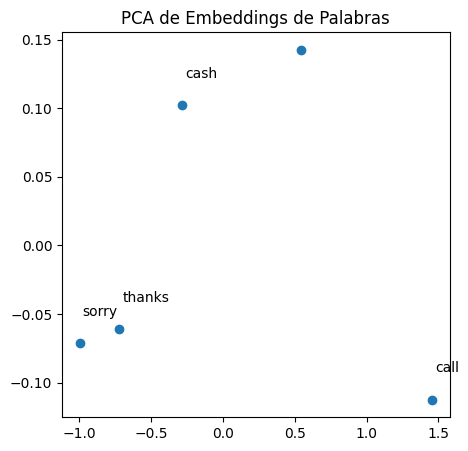

In [55]:
# Visualización:

import matplotlib.pyplot as plt
%matplotlib inline

# Visualizar
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
for i, word in enumerate(terms):
    axes.annotate(word, (vectors_pca[i, 0]+.02, vectors_pca[i, 1]+.02))
axes.set_title('PCA de Embeddings de Palabras')
plt.show()